# 프로젝트 : 다양한 OCR모델 비교하기

우리는 지금까지 Google OCR API, keras-ocr, Tesseract 이상 3가지의 OCR 기능을 간단히 활용하여 보았습니다.

지금까지 살펴본 바로는 무료로 사용할 수 있는 기능들이지만 모두 준수한 성능을 갖추고 있었습니다. OCR 분야가 이미 실용적인 수준에까지 기술이 발전했기 때문에 이런 것들만 잘 활용해도 실전에 활용할 수 있는 좋은 서비스를 만들어 낼 수 있을 것도 같습니다. 그런데 과연 어떤 것을 사용하는 것이 좋을까요?

OCR 기술들이 실용적인 수준까지 꽤 발전했지만 그럼에도 불구하고 아직 완전한 수준은 아닙니다. 용도에 맞게 적절한 것을 선택하는 것도 중요한 일입니다. 그래서 오늘 다뤄본 위 3가지를 검증해 보는 프로젝트를 진행하겠습니다. >> 여러분은 OCR 기능을 활용한 서비스를 빠르게 개발해야 하는 임무를 맡은 엔지니어가 되어, 어떤 모듈을 도입하면 좋을지 기술검증을 하는 역할을 맡게 되었다고 가정합니다. <<

프로젝트를 시작하기 전에 주요 라이브러리 버전을 살펴보죠.

In [1]:
import keras_ocr
import pytesseract

print(keras_ocr.__version__)
print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.
# !sudo apt install tesseract-ocr

0.8.8
0.3.8


### Step1. 검증용 데이터셋 준비

OCR 관련해서 오늘 다루어본 주제는 텍스트의 모양과 크기, 배치, 노이즈 등 OCR의 성능에 영향을 미치는 요인들에 관한 것이었습니다. 여러분들은 위 3가지 기능들이 이미지에 나타난 특징에 따라 얼마나 정확하게 문자를 detect하고 recognize하는지를 검증하기 위한 이미지 데이터를 모아야 합니다. 이미지가 많을수록 좋겠지만 검증해야 할 항목별로 고루 갖춰지는 것도 중요합니다.

가능하다면 함께 학습하는 동료들과 힘을 합쳐보는 것을 추천합니다. 그렇다고 너무 많은 이미지 데이터로 검증하는 것은 이후 결과를 정리하는 것이 힘들 수 있으니 테스트용 이미지는 아무리 많아도 20장을 넘기지 않는 것으로 합시다.

### Step2. keras-ocr, Tesseract로 테스트 진행(Google OCR API는 선택 사항)

위 두 가지 모듈을 활용하는 방법에 대해서는 코드 레벨로 이미 경험해 보셨을 것입니다. 이미지 리스트를 정리한 후 반복문을 실행하며 모듈이 출력한 결과를 모아 봅시다. 가능하다면 Google OCR API를 포함해 세 가지 모듈을 다 써보세요.

### Step3. 테스트 결과 정리

모듈들마다 출력 형태가 다릅니다. 분석을 위해 결과를 일목요연하게 정리해 보는 것이 도움이 될 것입니다. 시각화 방법이 함께 활용된다면 더욱 좋겠군요.

### Step4. 결과 분석과 결론 제시

우선 여러분들이 구현하고자 하는 서비스의 목적과 내용을 먼저 정리합니다. 여러분들이 검토한 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가 기준을 제시합니다. 그 기준에 따라 위에서 정리한 테스트 결과를 분석하여 가장 나은 대안의 모델을 선정합니다.

# 회고
## (1) 기준
저는 노이즈가 심하지 않은 단순한 형태의 영문을 검출하고 인식하는 정도의 서비스를 구현의 기준으로 생각하였습니다.
이번 노드를 통해 처음 OCR모델을 접한 저로서는, 우선 OCR모델의 작동방식을 이해하고 싶었기 때문입니다. 
## (2) 실험
노드에서 소개해준 unsplash 사이트의 text 카테고리 안에 있는 이미지 20장을 가지고 실험을 진행하였습니다.
이때 입력 이미지로는, (1)에서 설계한 기준에 맞추어 왜곡이나 각도 등의 변화가 많지 않은 비교적 단순한 형태의 이미지를 주로 사용하였습니다.
실험은 아래 셀부터 마지막 셀까지 (1) keras-ocr과 (2) 테서랙트의 총 두 가지 모델로 진행하였습니다.
## (3) 결론
[keras-ocr] 기본적인 영문글자체와는 약간 거리가 있는 손글씨 형태의 글자체도 꽤나 잘 인식하며(ex. Love to learn의 love to), 작은 글자(ex. you are important)도 잘 검출, 인식하는 모습을 보여줌
[테서랙트] 
i. 아주 기본적인 형태와 크기의 Serif나 San Serif 글자체만을 인식함 -> 그 외의 글자체, 작은 글씨 등에는 정확도가 생각보다 많이 떨어짐
ii. 그 외 keras-ocr모델에서는 발생하지 않았던 여러가지 오류가 발생
## ==> 초보 엔지니어로서 keras-ocr을 사용하는 것이 성능면과 안정성면에서 유리할 것으로 판단됨

#### (1) keras-ocr 

텐서플로우의 케라스 API를 기반으로 구현된 End-to-End OCR 모델. 
검출 모델로는 CRAFT(Character Region Awareness for Text Detection), 인식 모델로는 CRNN 사용

In [2]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [3]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
  'https://source.unsplash.com/ZM4TyOggk8Y',
  'https://source.unsplash.com/Z6U99OJ3p6A',
  'https://source.unsplash.com/YkNmM5NWnVs',
  'https://source.unsplash.com/XzUMBNmQro0',
  'https://source.unsplash.com/wuQFGqIV5QY',
  'https://source.unsplash.com/WE_Kv_ZB1l0',
  'https://source.unsplash.com/rjIMBeK3jmE',
  'https://source.unsplash.com/oAdrmLUco_g',
  'https://source.unsplash.com/lXr-c5MnCus',
  'https://source.unsplash.com/ISaO9EWUmDo',
  'https://source.unsplash.com/FYlFYAqukyg',
  'https://source.unsplash.com/fBw24ZcibPU',
  'https://source.unsplash.com/Bp2y6R81j-0',
  'https://source.unsplash.com/AzyqGr35vH0',
  'https://source.unsplash.com/aWZJCO4Rs1Y',
  'https://source.unsplash.com/aI_Ed6y13no',
  'https://source.unsplash.com/7qNoORUfAC0',
  'https://source.unsplash.com/6Lf1kzL4AfY',
  'https://source.unsplash.com/2nbIfDeT4t4',
  'https://source.unsplash.com/0BLE1xp5HBQ'
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

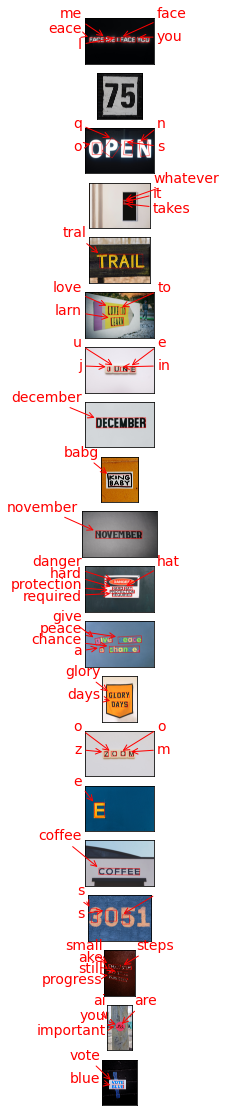

In [4]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

#### (2) 테서랙트(Tesseract) 
구글에서 후원하는 OCR 오픈소스 라이브러리. 현재 한국어를 포함한 116 개 국어를 지원
테서랙트를 사용하면 한 번에 이미지 내의 문자 검출과 인식을 할 수 있음.

In [5]:
# 테서랙트로 문자 검출하고 이미지 자르기 (detection)

import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/ZM4TyOggk8Y.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png


In [6]:
# 테서랙트로 잘린 이미지에서 단어 인식하기

def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

FACE

ME


FACE YOU

YOU

Done


In [7]:
# 이미지2

work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/Z6U99OJ3p6A.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

/aiffel/aiffel/ocr_python/0000.png

Done


In [8]:
# 이미지3

work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/YkNmM5NWnVs.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

/aiffel/aiffel/ocr_python/0000.png
OPEN

Done


In [9]:
# 이미지4

work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/XzUMBNmQro0.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
4

|

:

‘iia del

a

rita

a 7

Done


In [10]:
# 이미지5

img_file_path = work_dir + '/wuQFGqIV5QY.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

/aiffel/aiffel/ocr_python/0000.png
Seale

Done


In [11]:
# 이미지6
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/WE_Kv_ZB1l0.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

/aiffel/aiffel/ocr_python/0000.png


SystemError: tile cannot extend outside image

In [12]:
# 이미지7
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/rjIMBeK3jmE.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

/aiffel/aiffel/ocr_python/0000.png
J UNE

Done


In [13]:
# 이미지8
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/oAdrmLUco_g.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

/aiffel/aiffel/ocr_python/0000.png

Done


In [14]:
# 이미지9
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/lXr-c5MnCus.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

/aiffel/aiffel/ocr_python/0000.png


SystemError: tile cannot extend outside image

In [15]:
# 이미지10
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/ISaO9EWUmDo.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png

NOVEMBER


Done


In [16]:
# 이미지11
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/FYlFYAqukyg.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png
/aiffel/aiffel/ocr_python/0009.png
/aiffel/aiffel/ocr_python/0010.png
/aiffel/aiffel/ocr_python/0011.png
/aiffel/aiffel/ocr_python/0012.png
/aiffel/aiffel/ocr_python/0013.png
/aiffel/aiffel/ocr_python/0014.png
/aiffel/aiffel/ocr_python/0015.png
/aiffel/aiffel/ocr_python/0016.png
/aiffel/aiffel/ocr_python/0017.png
/aiffel/aiffel/ocr_python/0018.png
/aiffel/aiffel/ocr_python/0019.png
/aiffel/aiffel/ocr_python/0020.png
/aiffel/aiffel/ocr_python/0021.png
/aiffel/aiffel/ocr_python/0022.png
/aiffel/aiffel/ocr_python/0023.png
/aiffel/aiffel/ocr_python/0024.png
/aiffel/aiffel/ocr_python/0025.png
/aiffel/aiffel/ocr_python/0026.png
/aiffel/aiffel/ocr_python/0027.png
/aiffel/aiffel/ocr_p

In [17]:
# 이미지12
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/fBw24ZcibPU.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
give eace

e

@|

han e.

Done


In [18]:
# 이미지13
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/Bp2y6R81j-0.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

/aiffel/aiffel/ocr_python/0000.png
oF

Done


In [19]:
# 이미지14
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/AzyqGr35vH0.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

/aiffel/aiffel/ocr_python/0000.png
7 OOM

Done


In [20]:
# 이미지15
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/aWZJCO4Rs1Y.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

/aiffel/aiffel/ocr_python/0000.png
E

Done


In [21]:
# 이미지16
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/aI_Ed6y13no.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
a

COFFEE

|

Done


In [22]:
# 이미지17
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/7qNoORUfAC0.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

/aiffel/aiffel/ocr_python/0000.png

Done


In [23]:
# 이미지18
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/6Lf1kzL4AfY.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

/aiffel/aiffel/ocr_python/0000.png
=r

Done


In [24]:
# 이미지19
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/2nbIfDeT4t4.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

/aiffel/aiffel/ocr_python/0000.png
| : BS ;

Done


In [25]:
# 이미지20
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/0BLE1xp5HBQ.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

/aiffel/aiffel/ocr_python/0000.png


SystemError: tile cannot extend outside image